# Import Library

In [67]:
import pandas as pd
from wordcloud import  WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


# Persiapan Data

In [68]:
data = pd.DataFrame()
data = pd.read_csv("data_bersih.csv")
data = data.replace({'positif':1, 'negatif':0})
data

,Ulasan,Sentiment Score,Sentiment
0,bangun sejarah keren tempat bersih suasana kla...,6,1
1,banyak spot foto instagrammable tempat inipast...,-16,0
2,salah satu destinasi wisata yang semarang yang...,2,1
3,icon semarang gedung sejarah dahulu kantor ker...,-8,0
4,jalan jalan semarang jawa tengah lengkap belum...,-59,0
...,...,...,...
1052,waktu sama sekira tahun waktu pakai tentara pe...,-21,0
1053,arsitektur kokoh zamanya rawat jadi bangun sej...,-1,0
1054,tinggal asa sekali nuansa klasik antar imajina...,-7,0
1055,dahulu orang dengar nama gedung pikir angker d...,-16,0


# Visualisasi Kata

In [69]:
data_negatif = data[data['Sentiment'] == 0]
data_positif = data[data['Sentiment'] == 1]

In [70]:
data

,Ulasan,Sentiment Score,Sentiment
0,bangun sejarah keren tempat bersih suasana kla...,6,1
1,banyak spot foto instagrammable tempat inipast...,-16,0
2,salah satu destinasi wisata yang semarang yang...,2,1
3,icon semarang gedung sejarah dahulu kantor ker...,-8,0
4,jalan jalan semarang jawa tengah lengkap belum...,-59,0
...,...,...,...
1052,waktu sama sekira tahun waktu pakai tentara pe...,-21,0
1053,arsitektur kokoh zamanya rawat jadi bangun sej...,-1,0
1054,tinggal asa sekali nuansa klasik antar imajina...,-7,0
1055,dahulu orang dengar nama gedung pikir angker d...,-16,0


In [71]:
data.Sentiment.value_counts()

0    933
1    124
Name: Sentiment, dtype: int64

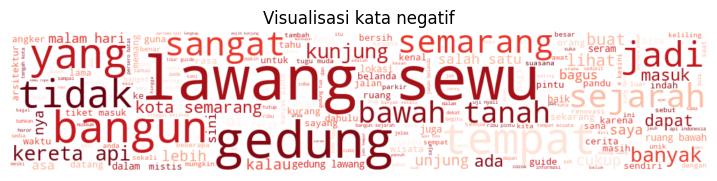

In [72]:
all_text_s0 = ' '.join(word for word in data_negatif['Ulasan'])
wordcloud = WordCloud(colormap='Reds', width=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi kata negatif")
plt.margins(x=0, y=0)
plt.show()

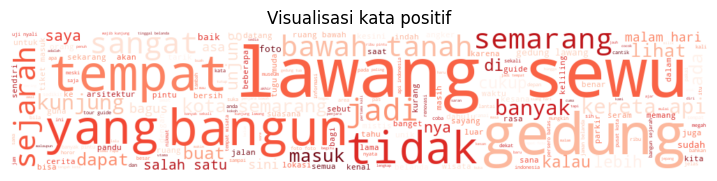

In [73]:
all_text_s1 = ' '.join(word for word in data_negatif['Ulasan'])
wordcloud = WordCloud(colormap='Reds', width=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi kata positif")
plt.margins(x=0, y=0)
plt.show()

Text(0.5, 1.0, 'Distribusi sentiment')

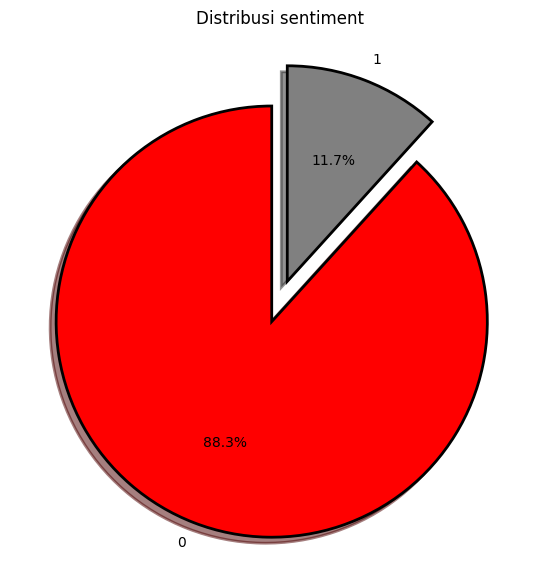

In [74]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'grey')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=data['Sentiment'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribusi sentiment')

# Pembobotan kata TF-IDF

In [75]:
Ulasan = data['Ulasan']  # Menyimpan kolom 'Ulasan' dari DataFrame ke variabel Ulasan
cv = CountVectorizer()  # Membuat objek CountVectorizer
term_fit = cv.fit(Ulasan)  # Melakukan fit pada data Ulasan dengan CountVectorizer

print(len(term_fit.vocabulary_))  # Mencetak jumlah kata unik dalam vocabulary


3338


In [76]:
term_fit.vocabulary_

{'bangun': 266,
 'sejarah': 2628,
 'keren': 1422,
 'tempat': 3006,
 'bersih': 391,
 'suasana': 2875,
 'klasik': 1474,
 'bagus': 228,
 'buat': 461,
 'foto': 874,
 'ikon': 1125,
 'kota': 1522,
 'semarang': 2670,
 'pasti': 2195,
 'nyempetin': 2086,
 'sini': 2791,
 'dong': 747,
 'banyak': 275,
 'kucing': 1541,
 'hehe': 1031,
 'spot': 2851,
 'instagrammable': 1175,
 'inipastikan': 1166,
 'jajah': 1212,
 'sudut': 2880,
 'cantik': 513,
 'iniklasik': 1163,
 'mewah': 1882,
 'gagah': 891,
 'kesan': 1438,
 'akan': 50,
 'dapat': 612,
 'lama': 1586,
 'unjung': 3197,
 'iniaura': 1161,
 'mistis': 1909,
 'lekat': 1645,
 'inisejuk': 1167,
 'rindang': 2491,
 'pepohonanrekomend': 2239,
 'teman': 3002,
 'mau': 1820,
 'salah': 2545,
 'satu': 2584,
 'destinasi': 662,
 'wisata': 3295,
 'yang': 3319,
 'anda': 105,
 'kunjung': 1554,
 'sedang': 2608,
 'libur': 1668,
 'di': 670,
 'lawang': 1622,
 'sewu': 2755,
 'sekali': 2635,
 'kalian': 1315,
 'nikmat': 2051,
 'harga': 1013,
 'tiket': 3077,
 'masuk': 1812,
 'ja

In [77]:
# Kolom pertama ini berarti jumlah dokumen
# Kolom kedua berarti letak kata nya
# Kolom ketiga berarti hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)  # Mengubah data Ulasan menjadi matriks frekuensi kata
print(term_frequency_all)  # Mencetak matriks frekuensi kata

  (0, 228)	1
  (0, 266)	1
  (0, 275)	1
  (0, 391)	1
  (0, 461)	1
  (0, 747)	1
  (0, 874)	2
  (0, 1031)	1
  (0, 1125)	1
  (0, 1422)	1
  (0, 1474)	1
  (0, 1522)	1
  (0, 1541)	1
  (0, 2086)	1
  (0, 2195)	1
  (0, 2628)	1
  (0, 2670)	1
  (0, 2791)	1
  (0, 2875)	1
  (0, 3006)	1
  (1, 50)	1
  (1, 266)	1
  (1, 275)	2
  (1, 461)	1
  (1, 513)	1
  :	:
  (1056, 2112)	1
  (1056, 2140)	1
  (1056, 2189)	3
  (1056, 2217)	1
  (1056, 2297)	1
  (1056, 2300)	1
  (1056, 2479)	1
  (1056, 2566)	1
  (1056, 2610)	2
  (1056, 2715)	1
  (1056, 2722)	2
  (1056, 2755)	2
  (1056, 2950)	1
  (1056, 3006)	4
  (1056, 3020)	1
  (1056, 3072)	2
  (1056, 3077)	4
  (1056, 3087)	1
  (1056, 3140)	1
  (1056, 3153)	1
  (1056, 3155)	2
  (1056, 3181)	1
  (1056, 3295)	2
  (1056, 3319)	1
  (1056, 3335)	1


In [78]:
ulasan_tf = Ulasan[80]  # Menyimpan ulasan ke-80 dari data ke variabel ulasan_tf
print(ulasan_tf)  # Mencetak ulasan tersebut


lawang sewu penuh nilai hystory jalan jalan kesana kayak balik masa lalu gedung sangat megah jam arsitek keren kesan rem hapus pas kesana banyak sekali wisatawan yang kunjung terus ada pagelaran musik kagum banget arsitek tinggal lawang sewu masih jaga baik informasi sejarah kita gali tinggal benda sejarah informasi poster pampang keren abiiss pokok


In [79]:
term_frequency = term_fit.transform([ulasan_tf])  # Mengubah ulasan ke dalam bentuk matriks frekuensi kata
print(term_frequency)  # Mencetak matriks frekuensi kata

  (0, 7)	1
  (0, 14)	1
  (0, 158)	2
  (0, 237)	1
  (0, 246)	1
  (0, 258)	1
  (0, 275)	1
  (0, 351)	1
  (0, 897)	1
  (0, 919)	1
  (0, 1011)	1
  (0, 1104)	1
  (0, 1156)	2
  (0, 1209)	1
  (0, 1216)	2
  (0, 1218)	1
  (0, 1300)	1
  (0, 1368)	1
  (0, 1422)	2
  (0, 1438)	1
  (0, 1439)	2
  (0, 1471)	1
  (0, 1554)	1
  (0, 1582)	1
  (0, 1622)	2
  (0, 1800)	1
  (0, 1803)	1
  (0, 1830)	1
  (0, 1969)	1
  (0, 2054)	1
  (0, 2145)	1
  (0, 2162)	1
  (0, 2190)	1
  (0, 2237)	1
  (0, 2321)	1
  (0, 2335)	1
  (0, 2459)	1
  (0, 2566)	1
  (0, 2628)	2
  (0, 2635)	1
  (0, 2755)	2
  (0, 3053)	1
  (0, 3086)	2
  (0, 3296)	1
  (0, 3319)	1


In [80]:
dokumen = term_fit.transform(Ulasan)  # Mengubah data Ulasan menjadi matriks frekuensi kata

# Membuat objek CountVectorizer dan TfidfTransformer
vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

# Menghitung frekuensi kata
term_frequency = vectorizer.fit_transform(Ulasan)

# Menghitung TF-IDF
tfidf = tfidf_transformer.fit_transform(term_frequency)

# Mendapatkan nama fitur (kata-kata unik dalam Ulasan)
feature_names = vectorizer.get_feature_names_out()

# Membuat DataFrame untuk nilai IDF
idf_df = pd.DataFrame(tfidf_transformer.idf_, index=feature_names, columns=["IDF"])
print("IDF values for each word in the reviews:")
print(idf_df)

# Membuat DataFrame untuk matriks TF-IDF
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=feature_names)
print("\nTF-IDF matrix for each word in the reviews:")
print(tfidf_df)


IDF values for each word in the reviews:
                IDF
aaamakk    7.270988
aahh       7.270988
abad       6.018225
abadi      4.968403
abai       7.270988
...             ...
you        6.354698
your       6.865523
yudhoyono  6.865523
zaman      3.956802
zamanya    7.270988

[3338 rows x 1 columns]

TF-IDF matrix for each word in the reviews:
      aaamakk  aahh  abad     abadi  abai  abdi  abelanda  abiiss       abu  \
0         0.0   0.0   0.0  0.000000   0.0   0.0       0.0     0.0  0.000000   
1         0.0   0.0   0.0  0.000000   0.0   0.0       0.0     0.0  0.000000   
2         0.0   0.0   0.0  0.190757   0.0   0.0       0.0     0.0  0.000000   
3         0.0   0.0   0.0  0.000000   0.0   0.0       0.0     0.0  0.000000   
4         0.0   0.0   0.0  0.000000   0.0   0.0       0.0     0.0  0.000000   
...       ...   ...   ...       ...   ...   ...       ...     ...       ...   
1052      0.0   0.0   0.0  0.000000   0.0   0.0       0.0     0.0  0.191955   
1053      0.0   0

In [81]:
#dokumen = term_fit.transform(Ulasan)
#tfidf_transformer = TfidfTransformer().fit(dokumen)

#print("Nilai IDF untuk setiap kata dalam ulasan:")
#print(tfidf_transformer.idf_)


#tfidf = tfidf_transformer.transform(term_frequency)
#print("\nMatriks TF-IDF untuk setiap kata dalam ulasan:")
#print("")
#print(tfidf)


In [82]:
#dokumen = term_fit.transform(Ulasan)
#tfidf_transformer = TfidfTransformer().fit(dokumen)
#print(tfidf_transformer.idf_)

#tfidf = tfidf_transformer.transform(term_frequency)
#print(tfidf)

In [83]:
data.to_csv("data_tf-idf.csv")